# Climate Change Sentiment Predictor

This project aims to develop a program that, given a tweet relating to climate change, can predict whether the user's sentiment is sympathetic regarding climate change or not. Using data from a dataset of tweets with a manually labeled sentiment to train from, we aim to help future analysis regarding climate change through this program that looks into human sentiments through tweets. By providing a program that automatically labels sentiments, this project can easily provide future research with numerous and timely data to use.

This project is developed by:

- Alvarado, Enrique Luis
- Bassig, Lance Raphael
- Roxas, Dennis Christian
- Surara, Ron Christian

## 1. Importing the dataset and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import nltk.downloader
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('Climate_Sentiments_Twitter.csv')
df.head()

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity,sympathy?
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,False,23415,20439,-0.054365,0.426984,news
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,Elsevier and the EditorsinChief are pleased to...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333,news
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238,news
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,news
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH cli...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,anti


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miuser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Data Preprocessing

Since working with a column that has a '?' is troublesome, we will be transforming the 'sympathy?' column to simply 'sympathy'

In [3]:
#Transforming the sympathy? column to sympathy
df.rename(columns={"sympathy?":"sympathy"}, inplace=True)

### 2.1 Data Cleaning

In [4]:
#Dropping unneeded columns
df = df[['text', 'sympathy']]
df.head()

,text,sympathy
0,The death of summer Arctic ice our Earth coole...,news
1,Elsevier and the EditorsinChief are pleased to...,news
2,From better climate change education to improv...,news
3,climate change Links to FIXING CLIMATE CHANGE ...,news
4,climate change The 11TH HOUR FOR THE EARTH cli...,anti


In [5]:
#Check if there are rows with missing values
df.isna().value_counts()

text   sympathy
False  False       396
dtype: int64

### 2.2 Data Encoding

In [6]:
#Transforming the sympathy column to numerical values using the replacement method
params = {"anti": -1, "neutral": 0, "pro": 1, "news": 2}
df['sympathy'].replace(params, inplace=True)
df.head()

,text,sympathy
0,The death of summer Arctic ice our Earth coole...,2
1,Elsevier and the EditorsinChief are pleased to...,2
2,From better climate change education to improv...,2
3,climate change Links to FIXING CLIMATE CHANGE ...,2
4,climate change The 11TH HOUR FOR THE EARTH cli...,-1


### 2.3 Data Representation

In [7]:
#Creating the feature(s) and target vectors
features = df.drop("sympathy", axis=1)
target = df["sympathy"]

features.head()

,text
0,The death of summer Arctic ice our Earth coole...
1,Elsevier and the EditorsinChief are pleased to...
2,From better climate change education to improv...
3,climate change Links to FIXING CLIMATE CHANGE ...
4,climate change The 11TH HOUR FOR THE EARTH cli...


### 2.4 Text Data Tokenization

In [8]:
#Tokenize the text data using RegexpTokenizer
textdata = features['text']
n = len(textdata)
tokenizer = RegexpTokenizer(r'\w+')
tokenizedtext = []

for i in range(n):
    #Convert text data to lowercase
    lower = textdata.iloc[i].lower()
    
    #Tokenize
    wordsarray = tokenizer.tokenize(lower)
    tokenizedtext.append(wordsarray)

#print(tokenizedText)

### 2.5 Text Data Cleaning

In [9]:
#Removing stop words using nlkt
englishstopwords = set(stopwords.words('english'))
shortertext = []

for tweet in tokenizedtext:
    shortertweet = []
    for word in tweet:
        if word not in englishstopwords:
            word = word.strip()
            if (word.isdigit() == False and len(word) >= 2):
                shortertweet.append(word)
    shortertext.append(shortertweet)

#print(shorterText)

In [10]:
#Stemming using PorterStemmer
porterstemmer = PorterStemmer()
stemmedtext = []
for tweet in shortertext:
    stemmedwords = []
    for word in tweet:
        stemmedwords.append(porterstemmer.stem(word))
    convertback = ' '.join(stemmedwords)
    stemmedtext.append(convertback)

#Create a separate dataframe dfcv for later EDA
dfcv = df.copy()
dfcv['text'] = stemmedtext

dfcv.head()

,text,sympathy
0,death summer arctic ice earth cooler year away...,2
1,elsevi editorsinchief pleas share first volum ...,2
2,better climat chang educ improv sustain here g...,2
3,climat chang link fix climat chang climatechan...,2
4,climat chang 11th hour earth climatechang glob...,-1


### 2.5 Text Data Vectorization

In [11]:
#Vectorizing the text data using TFIDvectorizer for Modelling
tfid = TfidfVectorizer()
vectorizedtdif = tfid.fit_transform(stemmedtext)

#print(vectorizedtfid)
#print(tfid.vocabulary_)

## 3. Exploratory Data Analysis

### 3.1 Distribution of Sentiments

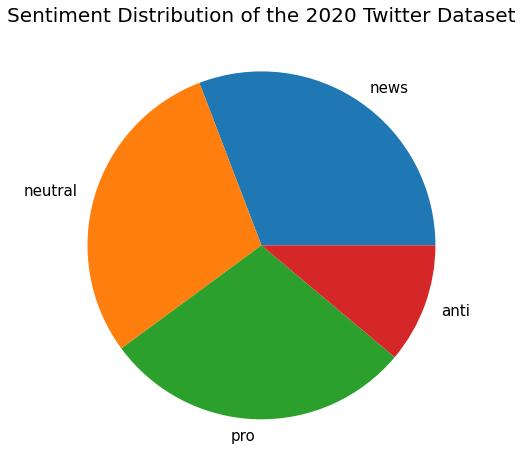

In [12]:
plt.figure(figsize = (8, 8))
values = df['sympathy'].value_counts().values
labels = ['news', 'neutral', 'pro', 'anti']
plt.pie(values, labels=labels, textprops={'fontsize': 15})
plt.title('Sentiment Distribution of the 2020 Twitter Dataset', fontsize=20)
plt.show()

### 3.2 Top 30 Occurrences of Words in Sympathetic Climate Change (pro) Tweets

<AxesSubplot:title={'center':'Top 30 Occurrences of Words in Sympathetic Climate Change (pro) Tweets'}>

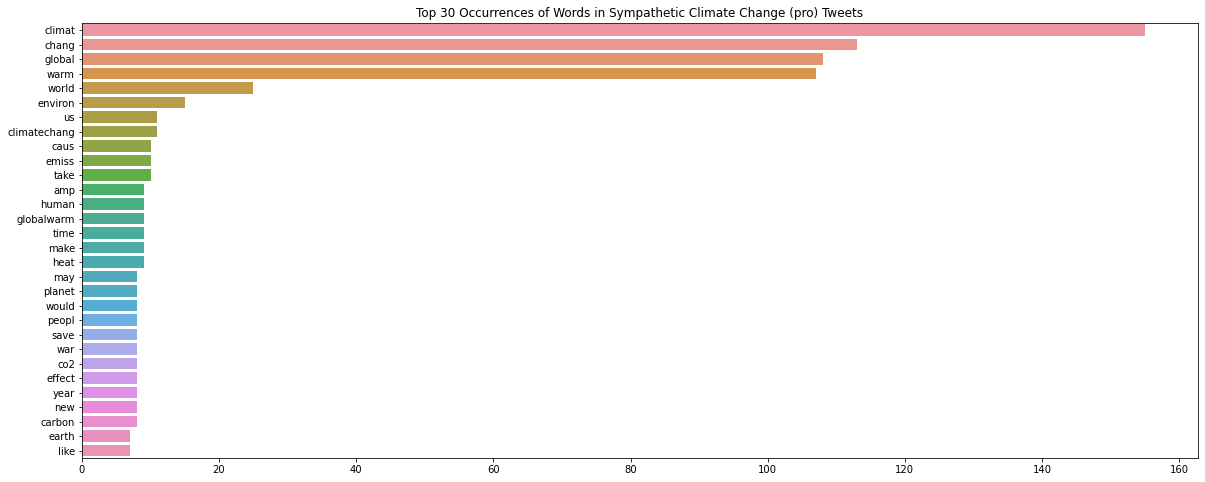

In [13]:
prodict = {}
protweets = dfcv[(dfcv['sympathy'] == 1)]

for i in range(protweets.shape[0]):
    wordarray = protweets['text'].iloc[i].split(" ")
    for word in wordarray:
        if word in prodict:
            prodict[word] += 1
        else:
            prodict[word] = 1

prodict = dict(sorted(prodict.items(), key=lambda item: item[1], reverse=True))
#print(prodict)

plt.figure(figsize=(20,8))
plt.title("Top 30 Occurrences of Words in Sympathetic Climate Change (pro) Tweets")
keys = list(prodict.keys())[:30]
vals = list(prodict.values())[:30]
sns.barplot(x=vals, y=keys)

#print(valuecounts)

### 3.3 Top 30 Occurrences of Words in Aphathetic Climate Change (anti) Tweets

<AxesSubplot:title={'center':'Top 30 Occurrences of Words in Aphathetic Climate Change (anti) Tweets'}>

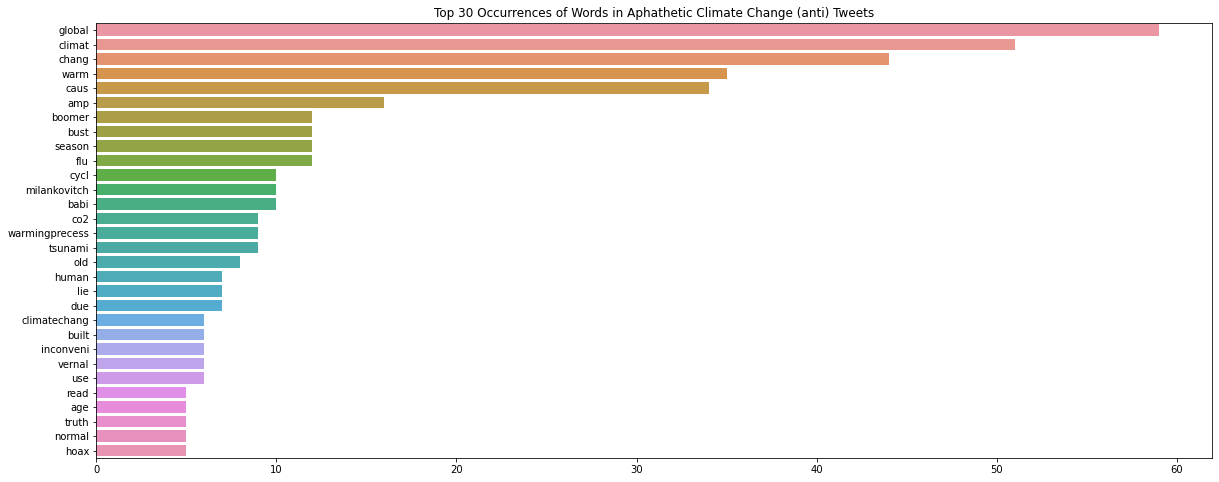

In [14]:
antidict = {}
antitweets = dfcv[(dfcv['sympathy'] == -1)]

for i in range(antitweets.shape[0]):
    wordarray = antitweets['text'].iloc[i].split(" ")
    for word in wordarray:
        if word in antidict:
            antidict[word] += 1
        else:
            antidict[word] = 1

antidict = dict(sorted(antidict.items(), key=lambda item: item[1], reverse=True))
#print(prodict)

plt.figure(figsize=(20,8))
plt.title("Top 30 Occurrences of Words in Aphathetic Climate Change (anti) Tweets")
keys = list(antidict.keys())[:30]
vals = list(antidict.values())[:30]
sns.barplot(x=vals, y=keys)

### 3.4 Top 30 Occurrences of Words in Neutral Climate Change (neutral) Tweets

<AxesSubplot:title={'center':'Top 30 Occurrences of Words in Neutral Climate Change (neutral) Tweets'}>

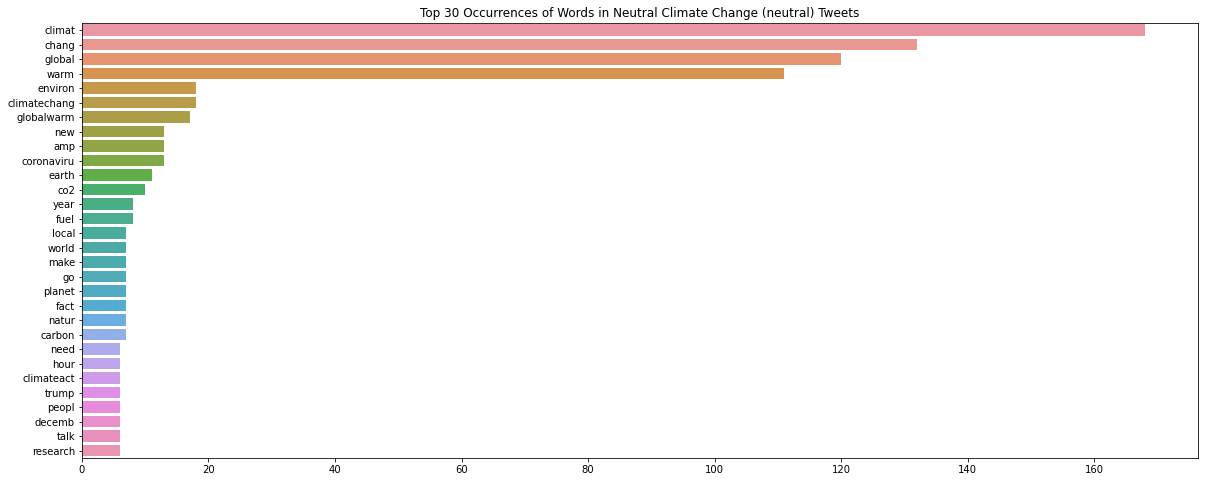

In [15]:
neutraldict = {}
neutraltweets = dfcv[(dfcv['sympathy'] == 0)]

for i in range(neutraltweets.shape[0]):
    wordarray = neutraltweets['text'].iloc[i].split(" ")
    for word in wordarray:
        if word in neutraldict:
            neutraldict[word] += 1
        else:
            neutraldict[word] = 1

neutraldict = dict(sorted(neutraldict.items(), key=lambda item: item[1], reverse=True))
#print(prodict)

plt.figure(figsize=(20,8))
plt.title("Top 30 Occurrences of Words in Neutral Climate Change (neutral) Tweets")
keys = list(neutraldict.keys())[:30]
vals = list(neutraldict.values())[:30]
sns.barplot(x=vals, y=keys)

### 3.5 Top 30 Occurrences of Words in Climate Change News (news) Tweets

<AxesSubplot:title={'center':'Top 30 Occurrences of Words in Climate Change News (news) Tweets'}>

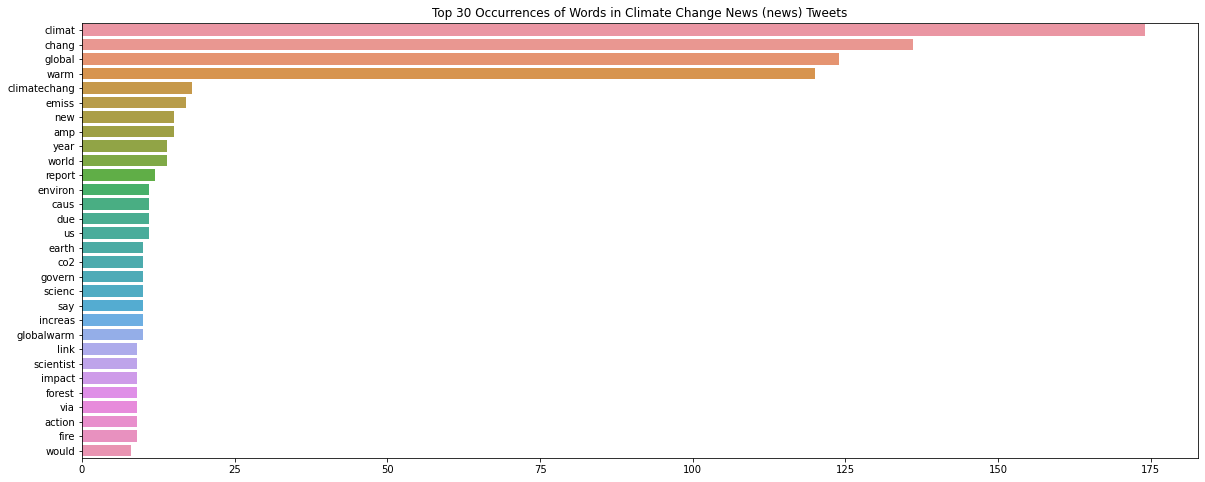

In [16]:
newsdict = {}
newstweets = dfcv[(dfcv['sympathy'] == 2)]

for i in range(newstweets.shape[0]):
    wordarray = newstweets['text'].iloc[i].split(" ")
    for word in wordarray:
        if word in newsdict:
            newsdict[word] += 1
        else:
            newsdict[word] = 1

newsdict = dict(sorted(newsdict.items(), key=lambda item: item[1], reverse=True))
#print(prodict)

plt.figure(figsize=(20,8))
plt.title("Top 30 Occurrences of Words in Climate Change News (news) Tweets")
keys = list(newsdict.keys())[:30]
vals = list(newsdict.values())[:30]
sns.barplot(x=vals, y=keys)

## PART 4 Data Modelling

In [17]:
#
# Use "vectorizedtfid" for the features matrix
# and "target" dataframe for the target vector
#

## PART 5 Data Testing